In [54]:
import numpy as np # numerical computing with Python
import pandas as pd # for data manipulation and analysis

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split    # For splitting data into train and test sets
from sklearn.decomposition import PCA     # For Principal Component Analysis
from sklearn.svm import SVC      # For Support Vector Classifier
from sklearn.naive_bayes import GaussianNB        # For Gaussian Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier   # For K-Nearest Neighbors classifier
from sklearn.tree import DecisionTreeClassifier    # For Decision Tree classifier
from sklearn.linear_model import LogisticRegression    # For Logistic Regression classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis    # For Linear Discriminant Analysis
from sklearn import metrics      # For evaluating model performance metrics

#System
import os
print(os.listdir("/Users/adithyasanthilal/Downloads/olivetti"))

['olivetti_faces_target.npy', 'olivetti_faces.npy']


In [55]:
# Importing warnings module to handle warnings,Filtering out and ignoring warnings and printing
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


In [56]:
#loads the data and target labels from two separate numpy files located at the specified paths. 
data=np.load("/Users/adithyasanthilal/Downloads/olivetti/olivetti_faces.npy")
target=np.load("/Users/adithyasanthilal/Downloads/olivetti/olivetti_faces_target.npy")

In [57]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
# Printing an example of scaled pixel values of the first image
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [58]:
#prints the unique target numbers or classes present in the target variable.
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [59]:
def show_40_distinct_people(images, unique_ids):
    """
    Function to display images of 40 distinct people in a dataset.

    Parameters:
        images (numpy.ndarray): Array containing the images to be displayed.
        unique_ids (list): List of unique IDs of the 40 distinct people.

    """
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration ,we flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        # Calculate the index of the first image associated with the current unique ID
        image_index=unique_id*10
        # Display the image associated with the calculated index on the corresponding subplot
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        # Remove tick marks on both x-axis and y-axis for improving the visual clarity of the subplot
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
         # Sets the title of the subplot to indicate the ID of the person
        axarr[unique_id].set_title("face id:{}".format(unique_id))
         # Sets a title for the entire figure
    plt.suptitle("There are 40 distinct people in the dataset")

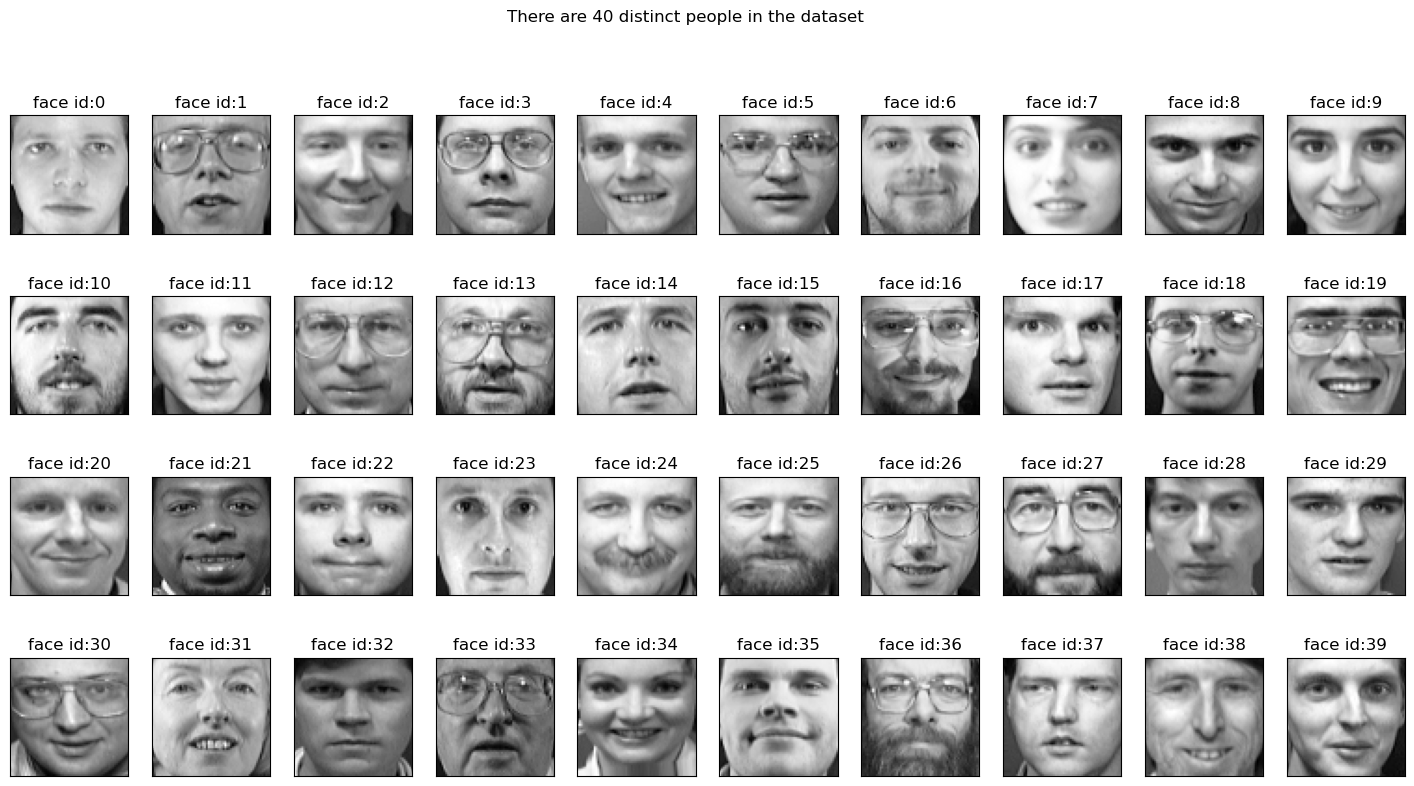

In [60]:
show_40_distinct_people(data, np.unique(target))

In [61]:
def show_10_faces_of_n_subject(images, subject_ids):
    """
    This function essentially creates a subplot grid and iterates through the provided subject IDs.
    For each subject, it retrieves and displays 10 corresponding face images from the dataset in a grid layout,
    hiding the axes and setting informative titles.
    """
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #calculates the number of rows needed in the subplot grid
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        #This loop iterates over each subject ID in the subject_ids list, along with its index i
        for j in range(cols):
            image_index=subject_id*10 + j
            #This line displays the image at the calculated index 
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

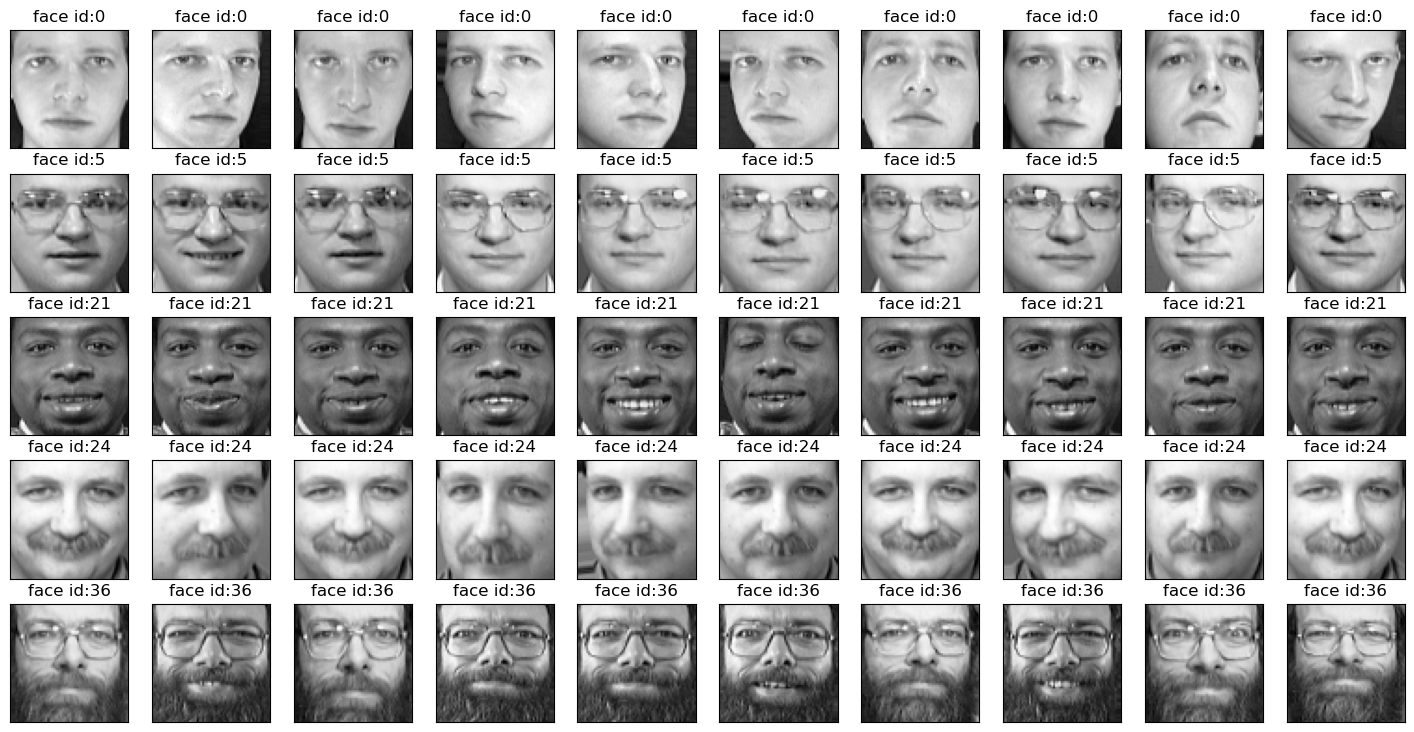

In [62]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

In [63]:
#Machine learning models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.
#This line reshapes the data array into a 2-dimensional array X where each row represents an image and each column represents a pixel
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [64]:
# Splitting the dataset into training and testing sets
# X: Feature dataset containing pixel values of the images
# test_size=0.3: Specifies that 30% of the data will be reserved for testing, and the remaining 70% will be used for training
# stratify=target: Ensures that the distribution of classes in the training and testing sets remains similar to the original dataset
# random_state=0: Sets the random seed for reproducibility, ensuring consistent results across multiple runs

X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))


X_train shape: (280, 4096)
y_train shape:(280,)


<Axes: title={'center': 'Number of Samples for Each Classes'}, xlabel='subject ids'>

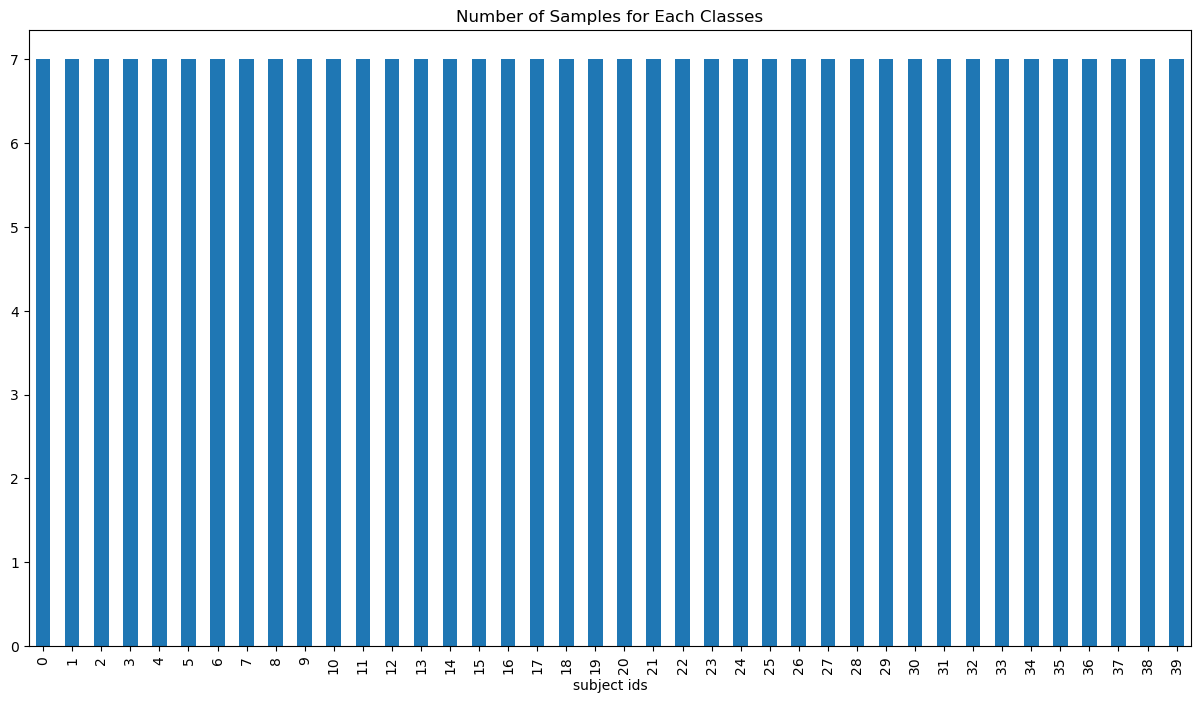

In [65]:
# Creating an empty DataFrame to store the target variable information
y_frame=pd.DataFrame()
# Adding the 'subject ids' column to the DataFrame and assigning it the values from the training target variable
y_frame['subject ids']=y_train
# Grouping the DataFrame by the 'subject ids' column and calculating the size (number of occurrences) of each group
# Plotting a bar chart to visualize the distribution of samples for each class (subject ids)
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [66]:
import mglearn

In [67]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [68]:
import mglearn

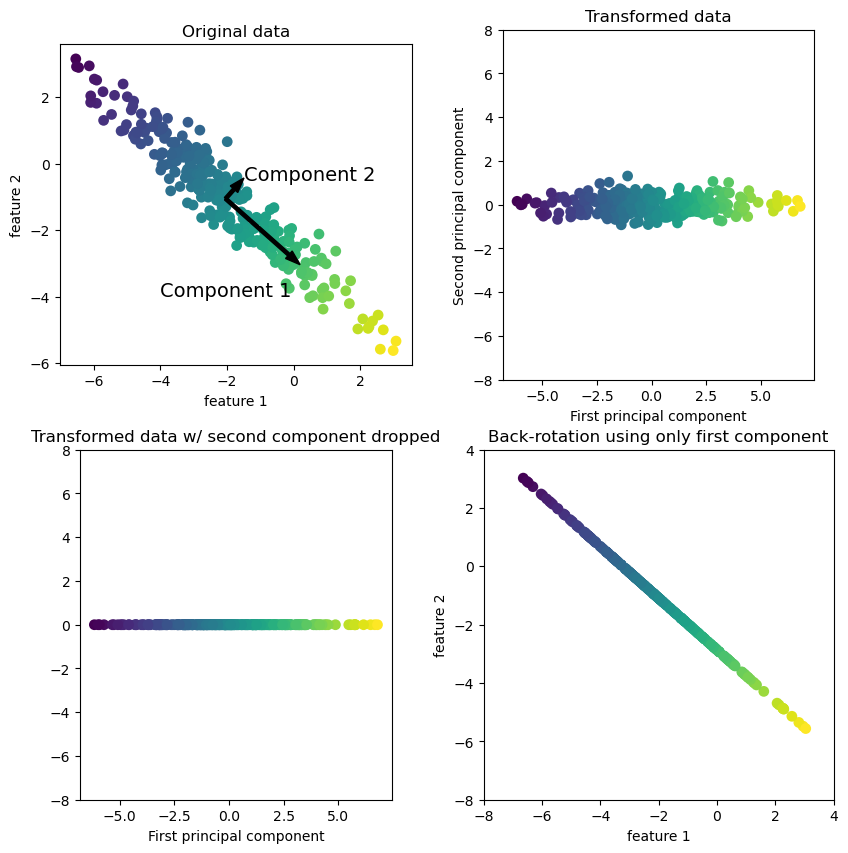

In [69]:
# Importing the mglearn library and calling its plot_pca_illustration function
# This function generates a visualization illustrating the concept of Principal Component Analysis (PCA)
# It helps in understanding how PCA transforms data points from a high-dimensional space to a lower-dimensional space
# and how it captures the main directions of variance in the data
# This visualization aids in comprehending the process of dimensionality reduction and information preservation with PCA
mglearn.plots.plot_pca_illustration()

In [70]:
#Each sample in X is here represented by two principal components instead of the original higher-dimensional features
from sklearn.decomposition import PCA
# Creating a PCA object with 2 principal components
pca=PCA(n_components=2)
# Fitting the PCA model to the data X
pca.fit(X)
# Transforming the data X into the new principal component space
X_pca=pca.transform(X)

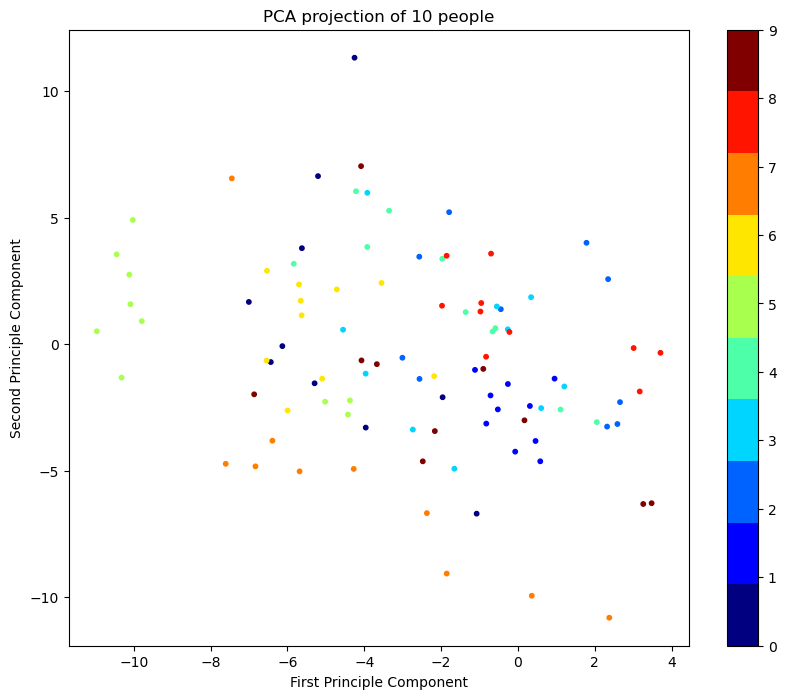

In [71]:
number_of_people=10
# Calculating the index range based on the number of people (each with 10 images)
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
# Creating a scatter plot of the PCA-transformed data
scatter=ax.scatter(X_pca[:index_range,0],   # x-coordinate (first principal component)
            X_pca[:index_range,1],          # y-coordinate (second principal component)
            c=target[:index_range],         # color based on target (face ID)
            s=10,                           # size of each point
           cmap=plt.get_cmap('jet', number_of_people)  # colormap for colors
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

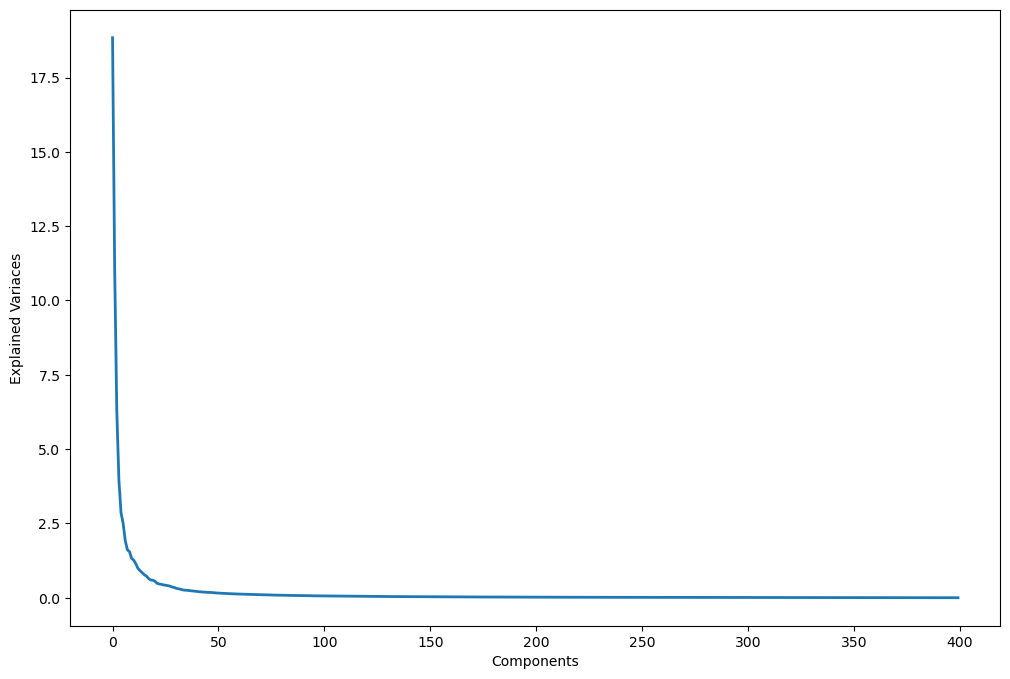

In [72]:
""" This plot helps in understanding how much information is captured by each principal component and 
can guide decisions on how many components to retain for dimensionality reduction or feature extraction."""
pca=PCA()  # Create a PCA object
pca.fit(X)   # Fit the PCA model to your data matrix X

plt.figure(1, figsize=(12,8))

# Plot the explained variance of each principal component
plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()


In [73]:
n_components=90

In [74]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

Text(0.5, 0.98, 'All Eigen Faces')

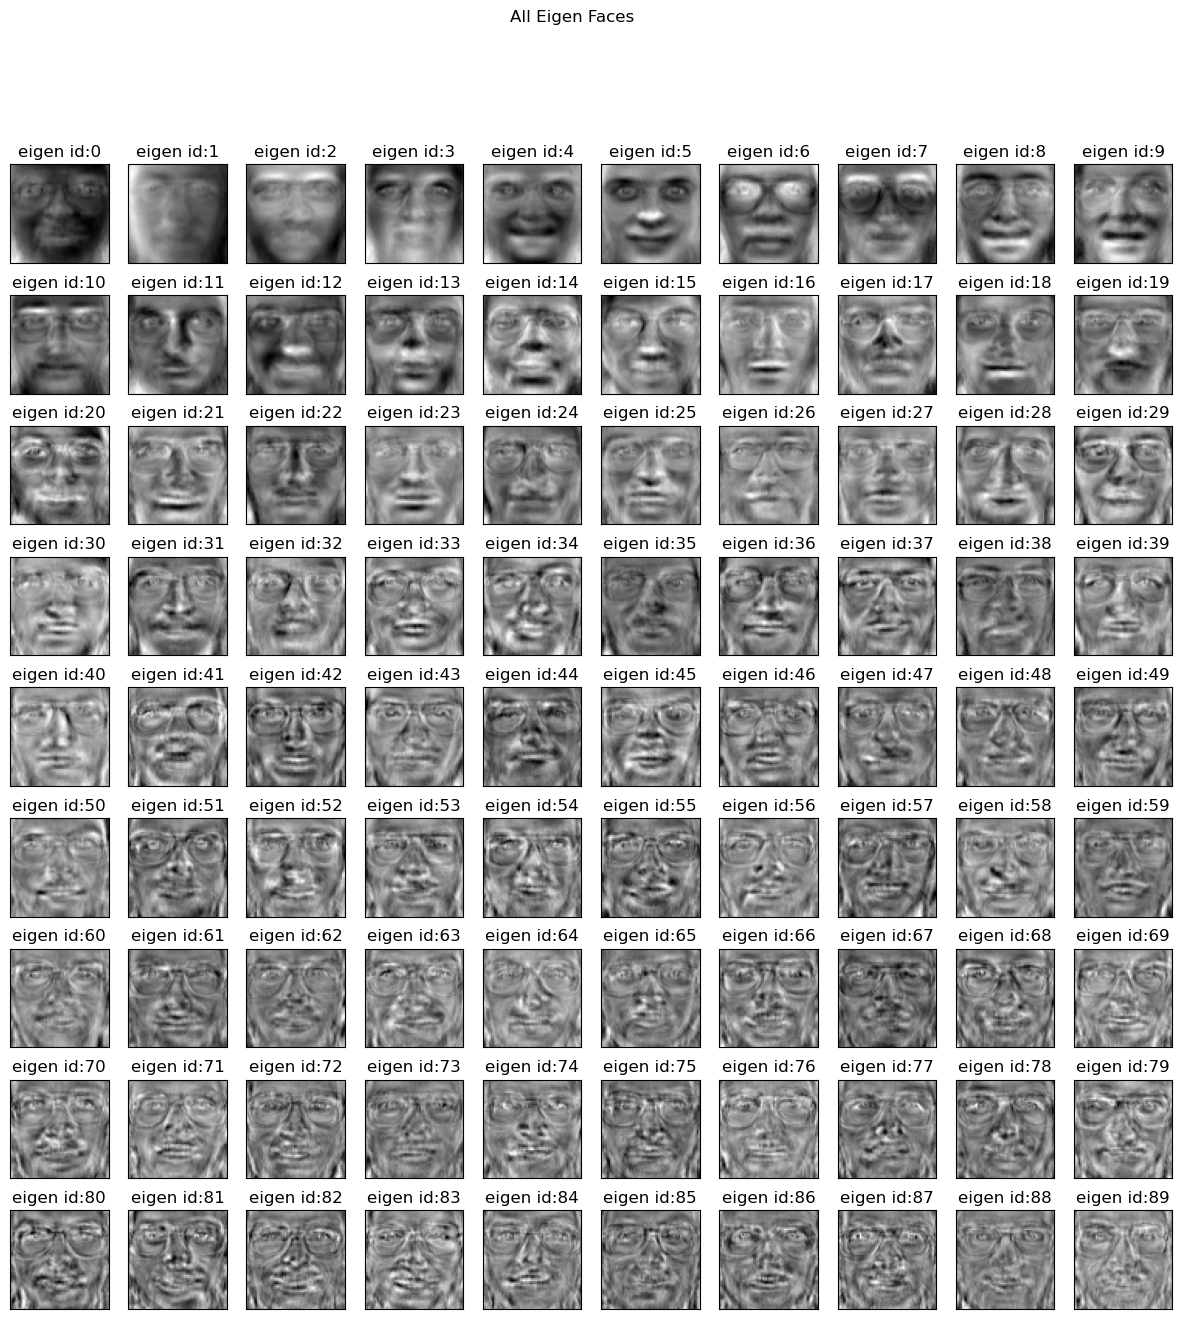

In [75]:
# Get the number of eigenfaces (principal components)
number_of_eigenfaces=len(pca.components_)
# Reshape the components to the original image dimensions (data.shape[1] x data.shape[2])
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

# Define the number of columns for subplots (eigenfaces per row)
cols=10
# Calculate the number of rows needed based on the number of eigenfaces and cols
rows=int(number_of_eigenfaces/cols)
# Create a figure with subplots arranged in rows and columns
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
# Flatten the subplot array for easy iteration
axarr=axarr.flatten()
# Iterate over each eigenface and display the eigenface in the corresponding subplot
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [76]:
# Transform the training dataset (X_train) using the PCA model
X_train_pca=pca.transform(X_train)
# Transform the test dataset (X_test) using the same PCA model
X_test_pca=pca.transform(X_test)

In [77]:
# Create a Support Vector Classifier (SVC) object
clf = SVC()
# Train the SVC model using the transformed training dataset (X_train_pca) and corresponding labels (y_train)
clf.fit(X_train_pca, y_train)
# Use the trained model to predict labels for the transformed test dataset (X_test_pca)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.93


<Axes: >

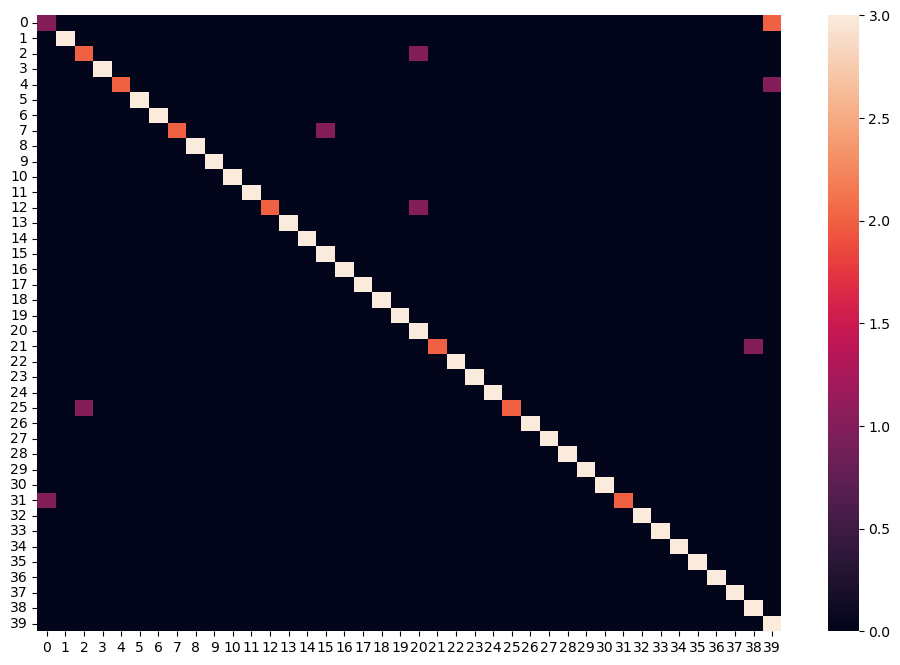

In [78]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

 print(metrics.classification_report(y_test, y_pred))

In [79]:
models=[]
# Appends each model along with its name to the list 'models'
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

# Iterate through each model in the 'models' list
for name, model in models:
    
    clf=model    # Instantiate the model

    clf.fit(X_train_pca, y_train)   # Fit the model on the training data

    y_pred=clf.predict(X_test_pca)   # Make predictions on the test data
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.93

========== LR RESULT ==========
Accuracy score:0.93

========== NB RESULT ==========
Accuracy score:0.87

========== KNN RESULT ==========
Accuracy score:0.72

========== DT RESULT ==========
Accuracy score:0.62

========== SVM RESULT ==========
Accuracy score:0.93



In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)  # Instantiate PCA with specified parameters
pca.fit(X)    # Fit PCA to the data and transform X
X_pca=pca.transform(X) 
# Iterate through each model in the 'models' list
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)   # Create a KFold cross-validation object
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)   # Perform cross-validation using the specified model and PCA-transformed data
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.97
LR mean cross validations score:0.94
NB mean cross validations score:0.79
KNN mean cross validations score:0.70
DT mean cross validations score:0.48
SVM mean cross validations score:0.87


In [81]:
lr=LinearDiscriminantAnalysis()     # Instantiate Linear Discriminant Analysis (LDA) classifier
lr.fit(X_train_pca, y_train)        # Fit LDA model to the PCA-transformed training data
y_pred=lr.predict(X_test_pca)       # Predict labels for the PCA-transformed test data
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))


Accuracy score:0.93


<Axes: >

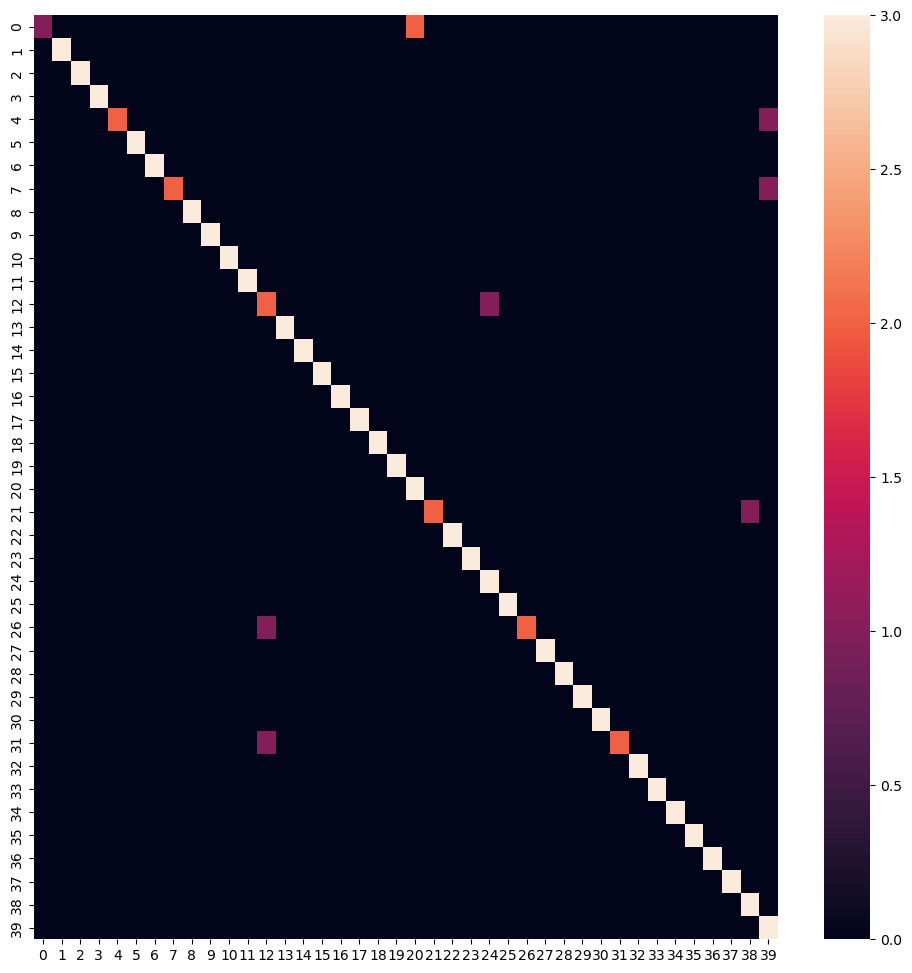

In [82]:
cm=metrics.confusion_matrix(y_test, y_pred)

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [83]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.50      0.67      0.57         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
   

In [84]:
"""LeaveOneOut() creates an iterator that yields train/test indices for each sample.
It splits the dataset into n consecutive folds, where n is the number of samples. 
For each iteration, one sample is used as the test set, and the rest are used as the training set."""
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LogisticRegression()   #initializes a logistic regression classifier.
""" computes the cross-validated scores for the specified classifier (clf).
It uses the provided dataset (X_pca and target) and cross-validation iterator (loo_cv) to split the data."""
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LogisticRegression Leave One Out cross-validation mean accuracy score:0.95


In [85]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LinearDiscriminantAnalysis()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LinearDiscriminantAnalysis Leave One Out cross-validation mean accuracy score:0.98


In [86]:
#We can do GridSearchCV to improve model generalization performance. To that we will tune the hyperparameters of Logistic Regression classifier.
from sklearn.model_selection import GridSearchCV

In [87]:
from sklearn.model_selection import LeaveOneOut
#You can use parameter:{'C': 1.0, 'penalty': 'l2'} 
#grid search cross validation score:0.93
"""
params={'penalty':['l1', 'l2'],
                'C':np.logspace(0, 4, 10)
                }
clf=LogisticRegression()
#kfold=KFold(n_splits=3, shuffle=True, random_state=0)
loo_cv=LeaveOneOut()
gridSearchCV=GridSearchCV(clf, params, cv=loo_cv)
gridSearchCV.fit(X_train_pca, y_train)
print("Grid search fitted..")
print(gridSearchCV.best_params_)
print(gridSearchCV.best_score_)
print("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))
"""

'\nparams={\'penalty\':[\'l1\', \'l2\'],\n                \'C\':np.logspace(0, 4, 10)\n                }\nclf=LogisticRegression()\n#kfold=KFold(n_splits=3, shuffle=True, random_state=0)\nloo_cv=LeaveOneOut()\ngridSearchCV=GridSearchCV(clf, params, cv=loo_cv)\ngridSearchCV.fit(X_train_pca, y_train)\nprint("Grid search fitted..")\nprint(gridSearchCV.best_params_)\nprint(gridSearchCV.best_score_)\nprint("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))\n'

In [88]:
lr=LogisticRegression(C=1.0, penalty="l2")  #Initializing Logistic Regression
#Here c controls the regularization strength,A smaller value of C indicates stronger regularization In this case, C=1.0 means moderate regularization.
lr.fit(X_train_pca, y_train) 
print("lr score:{:.2f}".format(lr.score(X_test_pca, y_test)))

lr score:0.93


In [89]:
from sklearn.preprocessing import label_binarize   #label_binarize is a function which converts categorical labels into a binary form suitable for multi-class classification.
from sklearn.multiclass import OneVsRestClassifier  #OneVsRestClassifier is a strategy for multi-class classification where one binary classifier is trained for each class.

Target=label_binarize(target, classes=range(40))  #Binarizing the Target Variable
print(Target.shape)  #prints the shape of the binarized target matrix
print(Target[0])   #prints the binary representation of the first image's target label

n_classes=Target.shape[1]   #n_classes is a variable which stores the total number of people in the dataset, which is equivalent to the number of columns in the binarized Target matrix.

(400, 40)
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [90]:
#uses train_test_split to split the data (X) and the binarized target (Target) into training and testing sets for a multi-class classification problem
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass=train_test_split(X, 
                                                                                              Target,
                                                                                             test_size=0.3,
                                                                                             stratify=Target,
                                                                                     random_state=0)

In [91]:
# Initialize PCA with specified number of components and whiten the data
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train_multiclass)   # Fit PCA on the training data to learn the principal components

# Transform the training data into the reduced feature space defined by the principal components
X_train_multiclass_pca=pca.transform(X_train_multiclass)
# Transform the testing data into the same reduced feature space using the learned PCA transformation
X_test_multiclass_pca=pca.transform(X_test_multiclass)
oneRestClassifier=OneVsRestClassifier(lr)

oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score=oneRestClassifier.decision_function(X_test_multiclass_pca)


In [92]:
# Initialize dictionaries to store precision, recall, and average precision scores for each class
precision = dict()
recall = dict()
average_precision = dict()

# Calculate precision, recall, and average precision for each class using precision_recall_curve
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_multiclass[:, i],
                                                        y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_multiclass[:, i], y_score[:, i])

# Calculate micro-average precision, recall, and average precision
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_multiclass.ravel(),
    y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_multiclass, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.96


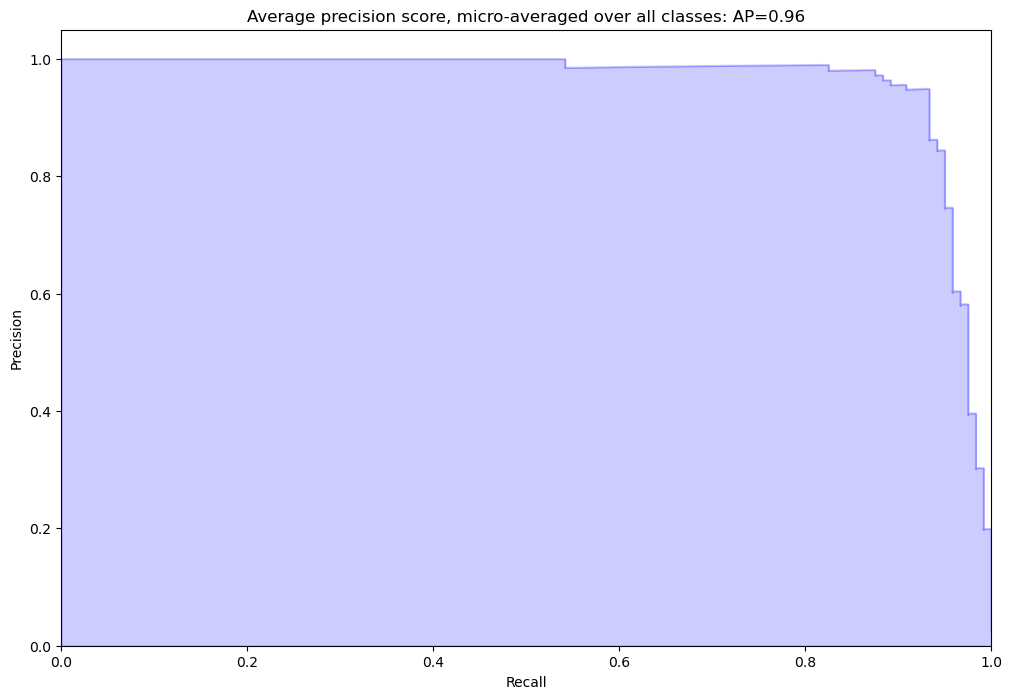

In [93]:
# Create step_kwargs dictionary based on the availability of 'step' argument in plt.fill_between 
step_kwargs = {'step': 'post'}

# Create a new figure for plotting precision-recall curve 
plt.figure(1, figsize=(12, 8))
# Plot the precision-recall curve using plt.step 
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
# Fill the area under the precision-recall curve using plt.fill_between 
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b', **step_kwargs)

# Customize plot labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))

# Show the plot
plt.show()

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [95]:
# Determine the number of components for LDA based on input data 

n_components = min(X_train.shape[1], len(np.unique(y_train)) - 1) 
# Create an instance of LinearDiscriminantAnalysis with specified number of components 

lda = LinearDiscriminantAnalysis(n_components=n_components) 

# Fit LDA to the training data and transform it 

X_train_lda = lda.fit(X_train, y_train).transform(X_train) 

# Transform the test data using the trained LDA model 

X_test_lda=lda.transform(X_test) 

In [96]:
# Create a LogisticRegression instance with specified regularization parameters 

lr=LogisticRegression(C=1.0, penalty="l2") 

# Fit the logistic regression model using the LDA-transformed training data 

lr.fit(X_train_lda,y_train) 

# Predict the target labels for the LDA-transformed test data 

y_pred=lr.predict(X_test_lda) 

In [97]:
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred))) 

print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred))) 

Accuracy score:0.95
Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00    

In [98]:
"""Application of machine learning on data sets has a standard workflow. Sklearn offers the Pipeline object to automate this workflow.
Pipeline allows standard work flows for performing machine learning operations such as scaling, feature extraction and modeling. 
The Pipeline guarantees the same operation in the entire data set, ensuring that the training and test data are consistent"""
from sklearn.pipeline import Pipeline

In [99]:
work_flows_std = list()
# Defines the components of your pipeline
work_flows_std.append(('lda', LinearDiscriminantAnalysis(n_components=n_components)))
work_flows_std.append(('logReg', LogisticRegression(C=1.0, penalty="l2")))
# Create a Pipeline object
model_std = Pipeline(work_flows_std)
# Fit the pipeline on the training data
model_std.fit(X_train, y_train)
y_pred=model_std.predict(X_test)

In [53]:
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))


Accuracy score:0.95
Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00    